<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">pyMATH</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">py<b style=color:red;>MATH</b></p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
<td><img style="height: 150px;" src="images/pyMATH.png"></td>
</tr>
</table>

----
# `pyMATH`

pyMATH, a program package for playing with math in python.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
#from ipywidgets import interact, interactive, fixed, interact_manual
import scipy.integrate

----
## Exponential functions

We continue with **exponential functions**, a group of functions, where the variable is subject to powers.

Consider time $t$ [s] as independent variable, then a **exponential function** is given as:
$$
f(t) = a_0 e^{a_1 t}
$$
with $a_i$ the coefficients.

We define the time scale, using the `linspace` function from the `numpy` package,
here from $t=0$s to $t=6$s, with 51 steps:

In [3]:
t = np.linspace(0,6,51)

Next, we define the **exponential function**:

In [4]:
def fexp(t,a):
    """
    calculate exponential function
    f(t) = a0 e^(a1 t)
    input:
    t    - array of time values
    a    - array of coefficients
    returns:
    fexp(t) - array of function values
    """
    fexp = a[0] * np.exp(a[1]*t)
    return fexp

We use two settings for parameter values, one with **positive** exponent $a$,
one with **negative** exponent $b$.

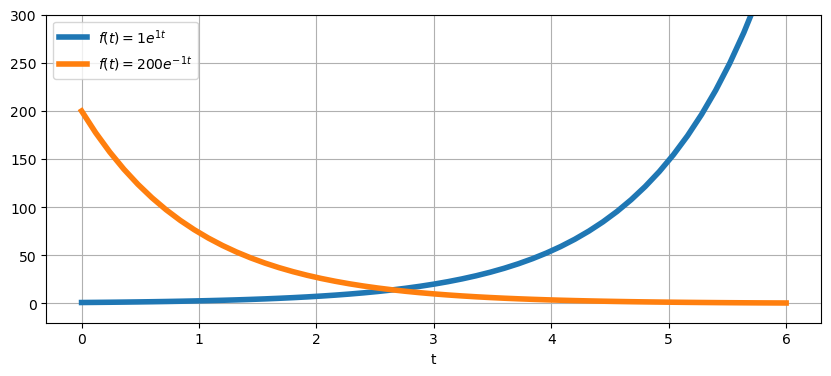

In [6]:
a = [1,1]
b = [200,-1]


function1 = '$f(t)='+str(a[0])+'e^{'+str(a[1])+' t}$'
function2 = '$f(t)='+str(b[0])+'e^{'+str(b[1])+' t}$'

plt.figure(figsize=(10,4))
plt.xlabel('t')
plt.ylim([-20,300])
plt.plot(t,fexp(t,a),lw=4,label=function1)
plt.plot(t,fexp(t,b),lw=4,label=function2)
plt.grid()
plt.legend()

----
## Using `interact` from the `ipywidgets` library:

In [7]:
def fexp2(t,a0=1,a1=1):
    """
    calculate exponential function
    f(t) = a0 e^(a1*t)    
    version for interact ...
    """
    # assemble function   
    fexp2  = a0*np.exp(a1*t)
    # plot function
    plt.figure(figsize=(10,4))
    plt.xlabel('t')
    plt.ylim([-100,100])
    plt.plot(t,fexp2,lw=4,label='f')
    plt.grid()
    plt.legend()
    return

In [8]:
widgets.interact(fexp2,
                 t=widgets.fixed(t),
                 a0=widgets.IntSlider(min=1, max=100, step=1, value=1),
                 a1=widgets.FloatSlider(min=-3, max=3, step=0.2, value=0))

interactive(children=(IntSlider(value=1, description='a0', min=1), FloatSlider(value=0.0, description='a1', ma…

<function __main__.fexp2(t, a0=1, a1=1)>

----
## Taylor series expansion
The **exponential functions** can be developed into a **Taylor series** around the 
developing point $x_0=0$, with $a_0=1$ and $a_1=1$:
$$
e^t \simeq 1 + t + \frac{t^2}{2} + \frac{t^3}{6}
$$
or:
$$\fbox{$
e^t 
= \sum\limits_{n=0}^{\infty} \frac{t^n}{n!} 
$}$$

We write a function for this Taylor-series expansion:

In [9]:
def fexpTaylor(t,n):
    """
    function sums up Taylor series for e^t
    Note that n=0 is defined as starting value
    input:
    t    - array of time values
    n    - max expansion order
    returns:
    fexpTaylor(t) - array of function values
    """
    y = np.ones(len(t))
    if (n==0): return y
    for i in range(1,n+1):
        y += t**(i)/np.math.factorial(i)
    return y

Here, $n$ is the counter for the derivatives used for the Taylor series.

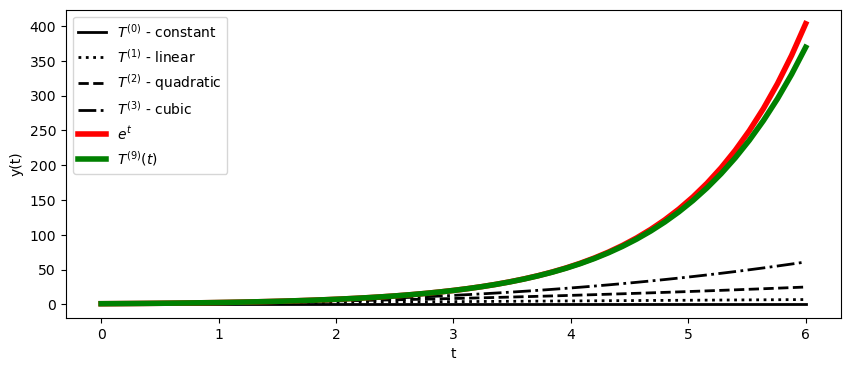

In [10]:
plt.figure(figsize=(10,4))
plt.xlabel('t')
plt.ylabel('y(t)')
plt.plot(t,fexpTaylor(t,0),linewidth=2,linestyle='-',color='black',label='$T^{(0)}$ - constant')
plt.plot(t,fexpTaylor(t,1),linewidth=2,linestyle=':',color='black',label='$T^{(1)}$ - linear')
plt.plot(t,fexpTaylor(t,2),linewidth=2,linestyle='--',color='black',label='$T^{(2)}$ - quadratic')
plt.plot(t,fexpTaylor(t,3),linewidth=2,linestyle='-.',color='black',label='$T^{(3)}$ - cubic')
plt.plot(t,fexp(t,a=[1,1]),linewidth=4,color='red',label='$e^t$')
n = 9
plt.plot(t,fexpTaylor(t,n),linewidth=4,color='green',label='$T^{('+str(n)+')}(t)$')
plt.legend()

----
## Differential equation

The exponential function $y(t) = a_0 e^{-a_1 t}$ is the solution of the 
**differential equation**:
$$
\frac{\partial y}{\partial t} = -a_1 y
$$

Use first derivative to proof:
$$
\frac{\partial y}{\partial t} = -a_0 a_1 e^{-a_1 t}
$$

In [13]:
#define coefficients
a0 = 1
a1 = 1

# define the right-hand side
def rhs(t,y,a0,a1):
    dydt = -a0*a1*np.exp(-a1*t)
    return dydt

# define the initial condition
y0 = [1]

# solve the ODE for the given range
dydt = scipy.integrate.solve_ivp(rhs,[t.min(),t.max()],y0,t_eval=t,args=(a0,a1))
print(dydt.t,dydt.y)

[0.   0.12 0.24 0.36 0.48 0.6  0.72 0.84 0.96 1.08 1.2  1.32 1.44 1.56
 1.68 1.8  1.92 2.04 2.16 2.28 2.4  2.52 2.64 2.76 2.88 3.   3.12 3.24
 3.36 3.48 3.6  3.72 3.84 3.96 4.08 4.2  4.32 4.44 4.56 4.68 4.8  4.92
 5.04 5.16 5.28 5.4  5.52 5.64 5.76 5.88 6.  ] [[1.         0.88691943 0.78659903 0.6976254  0.61873968 0.54879767
  0.48676979 0.43174113 0.38291138 0.33959492 0.30111602 0.26683482
  0.23636146 0.20933199 0.18540375 0.16425537 0.14558677 0.12911917
  0.11459506 0.10177825 0.09045383 0.08042817 0.07152896 0.06360515
  0.05652701 0.05018608 0.0444952  0.03938852 0.03482144 0.03077069
  0.0272342  0.02413592 0.02137784 0.01892803 0.01675643 0.01483479
  0.01313667 0.01163748 0.01031445 0.00914664 0.00811492 0.007202
  0.00639243 0.00567256 0.00503058 0.00445652 0.00394221 0.00348132
  0.00306936 0.00270364 0.00238332]]


half time:  0.6931471805599453


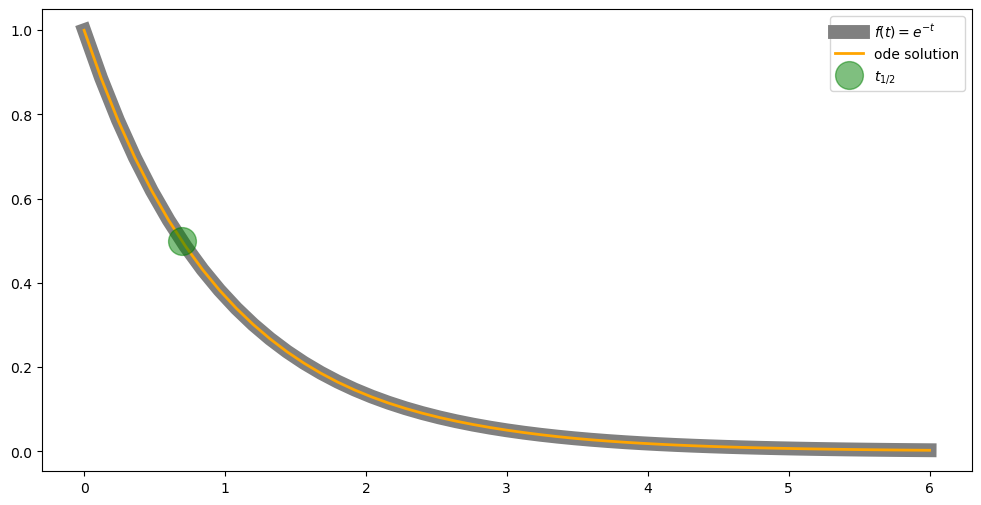

In [14]:
plt.figure(figsize=(12,6))
plt.plot(t,np.exp(-a1*t),linewidth=10,color='gray',label='$f(t)=e^{-t}$')
plt.plot(dydt.t,dydt.y[0],linewidth=2,color='orange',label='ode solution')
t_half = np.log(2)/a1
print('half time: ',t_half)
plt.plot(t_half,np.exp(-a1*t_half),marker='o',markersize=20,color='green',alpha=0.5,lw=0,label='$t_{1/2}$')
plt.legend()

----
## Compare geometrical and exponential functions

$$
\begin{array}{rcl}
f_1(t) &=& t^2 \\
f_2(t) &=& e^t \\
\end{array}
$$

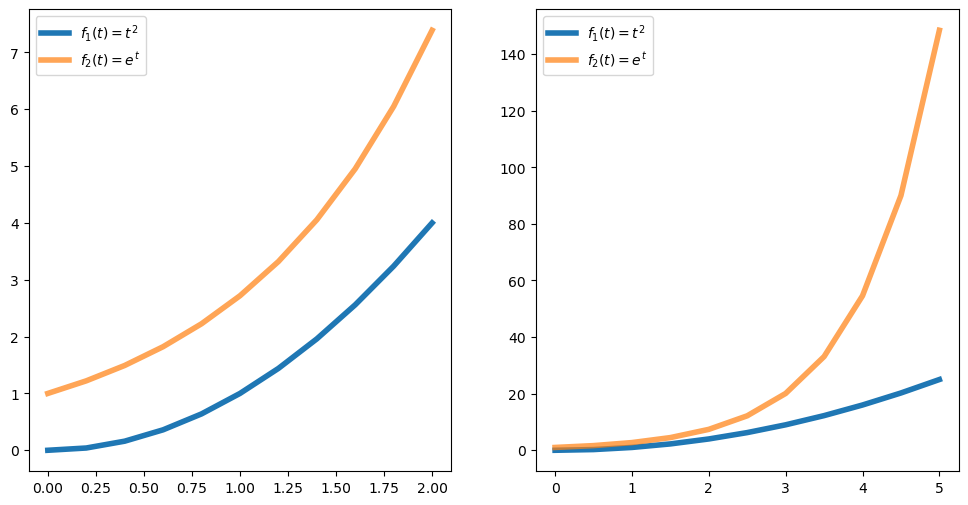

In [31]:
t1 = np.linspace(0,2,11)
t2 = np.linspace(0,5,11)

fig,axs = plt.subplots(1,2,figsize=(12,6))

f1 = t1**2
f2 = np.exp(t1)
axs[0].plot(t1,f1,lw=4,label="$f_1(t)=t^2$")
axs[0].plot(t1,f2,lw=4,label="$f_2(t)=e^t$",alpha=0.7)
axs[0].legend()

f1 = t2**2
f2 = np.exp(t2)
axs[1].plot(t2,f1,lw=4,label="$f_1(t)=t^2$")
axs[1].plot(t2,f2,lw=4,label="$f_2(t)=e^t$",alpha=0.7)
axs[1].legend()

----

$$
\begin{array}{rcl}
log(ab) &=& log(a) + log(b) \\
log({{a}\over{b}}) &=& log(a) - log(b)
\end{array}
$$